In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



In [7]:
data = pd.read_csv('weatherAUS.csv') # load the dataset

In [8]:
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [12]:
data.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

1. Data cleaning
 Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null   float64
 18  Cloud3pm       86102 non-null   float64
 19  Temp9am        143693 non-null  float64

In [13]:
px.histogram(data, x='Location', color='RainToday', title='Rainy days over all locations in Australia',color_discrete_sequence= ["green","orange"])

In [14]:
px.histogram(data, x='Location', color='RainTomorrow', title='Rainy days over all locations in Australia',color_discrete_sequence= ["green","orange"])

In [15]:
px.histogram(data.sample(3000), x='Temp3pm', color='RainTomorrow', title='Rain Tomorrow vs Temperature at 3pm',color_discrete_sequence= ["green","orange"])
px.histogram(data.sample(3000), x='Temp9am', color='RainToday', title='Rain Today vs Temperature at 9am',color_discrete_sequence= ["green","orange"])

Compare features of rain and not rain days

In [16]:
data_rain = data[data["RainToday"] == "Yes"]
data_norain = data[data["RainToday"] == "No"]

In [17]:
fig = px.scatter(data.sample(100), x="Temp3pm", y="Temp9am", color="RainToday",color_discrete_sequence= ["green","orange"])
fig.show()

In [18]:
numerical_columns = data.select_dtypes(include=np.number).columns # get numerical columns 
categorical_columns = data.select_dtypes('object').columns # get 
data[categorical_columns].nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

Data cleaning

In [19]:
data["MinTemp"].fillna(data["MinTemp"].median(), inplace=True)
data["MaxTemp"].fillna(data["MaxTemp"].median(), inplace=True)
data["Rainfall"].fillna(data["Rainfall"].median(), inplace=True)
data["Evaporation"].fillna(data["Evaporation"].median(), inplace=True)
data["Sunshine"].fillna(data["Sunshine"].median(), inplace=True)
data["WindGustSpeed"].fillna(data["WindGustSpeed"].median(), inplace=True)
data["WindSpeed9am"].fillna(data["WindSpeed9am"].median(), inplace=True)
data["WindSpeed3pm"].fillna(data["WindSpeed3pm"].median(), inplace=True)
data["Humidity9am"].fillna(data["Humidity9am"].median(), inplace=True)
data["Humidity3pm"].fillna(data["Humidity3pm"].median(), inplace=True)
data["Pressure9am"].fillna(data["Pressure9am"].median(), inplace=True)
data["Pressure3pm"].fillna(data["Pressure3pm"].median(), inplace=True)
data["Cloud9am"].fillna(data["Cloud9am"].median(), inplace=True)
data["Cloud3pm"].fillna(data["Cloud3pm"].median(), inplace=True)
data["Temp9am"].fillna(data["Temp9am"].median(), inplace=True)
data["Temp3pm"].fillna(data["Temp9am"].median(), inplace=True)
data["Date"].fillna('Unknown' , inplace=True)
data["Location"].fillna('Unknown', inplace=True)
data["WindDir9am"].fillna('Unknown', inplace=True)
data["WindGustDir"].fillna('Unknown', inplace=True)
data["WindDir3pm"].fillna('Unknown', inplace=True)
data["RainToday"].fillna('Unknown', inplace=True)
data["RainTomorrow"].fillna('Unknown', inplace=True)


In [20]:
data.isna().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Onehot encoding and MinMax Normalization - we do not know distribution of data	

In [21]:
encoded_scaler_data = data

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[numerical_columns])
data[numerical_columns] = scaler.transform(data[numerical_columns])

In [23]:
categorical_columns1 = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'] 

In [24]:
data

Date Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury  0.516509  0.523629  0.001617     0.033103   
1       2008-12-02   Albury  0.375000  0.565217  0.000000     0.033103   
2       2008-12-03   Albury  0.504717  0.576560  0.000000     0.033103   
3       2008-12-04   Albury  0.417453  0.620038  0.000000     0.033103   
4       2008-12-05   Albury  0.613208  0.701323  0.002695     0.033103   
...            ...      ...       ...       ...       ...          ...   
145454  2017-06-20    Uluru  0.283019  0.502836  0.000000     0.033103   
145455  2017-06-21    Uluru  0.266509  0.533081  0.000000     0.033103   
145456  2017-06-22    Uluru  0.285377  0.568998  0.000000     0.033103   
145457  2017-06-23    Uluru  0.327830  0.599244  0.000000     0.033103   
145458  2017-06-24    Uluru  0.384434  0.601134  0.000000     0.033103   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0       0.586207           W       0.294574          W  ...        0.71   
1       0.586207         WNW       0.294574        NNW  ...        0.44   
2       0.586207         WSW       0.310078          W  ...        0.38   
3       0.586207          NE       0.139535         SE  ...        0.45   
4       0.586207           W       0.271318        ENE  ...        0.82   
...          ...         ...            ...        ...  ...         ...   
145454  0.586207           E       0.193798        ESE  ...        0.59   
145455  0.586207           E       0.193798         SE  ...        0.51   
145456  0.586207         NNW       0.124031         SE  ...        0.56   
145457  0.586207           N       0.240310         SE  ...        0.53   
145458  0.586207          SE       0.170543        SSE  ...        0.51   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0              0.22     0.449587       0.4800  0.888889  0.555556  0.508439   
1              0.25     0.497521       0.4912  0.555556  0.555556  0.514768   
2              0.30     0.447934       0.5056  0.555556  0.222222  0.594937   
3              0.16     0.613223       0.5712  0.555556  0.555556  0.533755   
4              0.33     0.500826       0.4624  0.777778  0.888889  0.527426   
...             ...          ...          ...       ...       ...       ...   
145454         0.27     0.730579       0.7056  0.555556  0.555556  0.350211   
145455         0.24     0.728926       0.6912  0.555556  0.555556  0.364979   
145456         0.21     0.710744       0.6720  0.555556  0.555556  0.381857   
145457         0.24     0.669421       0.6352  0.555556  0.555556  0.415612   
145458         0.24     0.642975       0.6304  0.333333  0.222222  0.470464   

         Temp3pm  RainToday  RainTomorrow  
0       0.522073         No            No  
1       0.570058         No            No  
2       0.548944         No            No  
3       0.612284         No            No  
4       0.673704         No            No  
...          ...        ...           ...  
145454  0.504798         No            No  
145455  0.533589         No            No  
145456  0.573896         No            No  
145457  0.604607         No            No  
145458  0.602687         No            No  

[140787 rows x 23 columns]

In [25]:
#categorical_columns = categorical_columns.drop('RainTomorrow')

encoder = OneHotEncoder(sparse=False, handle_unknown = 'ignore') 
encoder.fit(data[categorical_columns1])
#data[categorical_columns1] = encoder.transform(data[categorical_columns1])
encoded_columns = list(encoder.get_feature_names_out(categorical_columns1))
data[encoded_columns] = encoder.transform(data[categorical_columns1])

C:\Users\jalpa\AppData\Local\Temp\ipykernel_10756\4016161292.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\jalpa\AppData\Local\Temp\ipykernel_10756\4016161292.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\jalpa\AppData\Local\Temp\ipykernel_10756\4016161292.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

Split data set

In [26]:
data['Date'] = pd.to_datetime(data['Date']) 
data['Year'] = data['Date'].dt.year 
data.drop(categorical_columns1,
  axis='columns', inplace=True)
# data.drop('Date',
#   axis='columns', inplace=True)


C:\Users\jalpa\AppData\Local\Temp\ipykernel_10756\1718336524.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [27]:
data.loc[:, data.columns.str.startswith('Rain')]


Rainfall RainTomorrow  RainToday_No  RainToday_Yes
0       0.001617           No           1.0            0.0
1       0.000000           No           1.0            0.0
2       0.000000           No           1.0            0.0
3       0.000000           No           1.0            0.0
4       0.002695           No           1.0            0.0
...          ...          ...           ...            ...
145454  0.000000           No           1.0            0.0
145455  0.000000           No           1.0            0.0
145456  0.000000           No           1.0            0.0
145457  0.000000           No           1.0            0.0
145458  0.000000           No           1.0            0.0

[140787 rows x 4 columns]

In [28]:
X_train_val, x_test = train_test_split(data, test_size = 0.1, random_state = 1)
x_train, x_val= train_test_split(X_train_val, test_size=0.25, random_state=42)

y_train = x_train['RainTomorrow']
y_test = x_test['RainTomorrow']
y_val = x_val['RainTomorrow']

x_train = x_train.drop(['RainTomorrow'],axis=1)
x_test = x_test.drop(['RainTomorrow'],axis=1)
x_val = x_val.drop(['RainTomorrow'],axis=1)



<AxesSubplot: xlabel='Year', ylabel='count'>

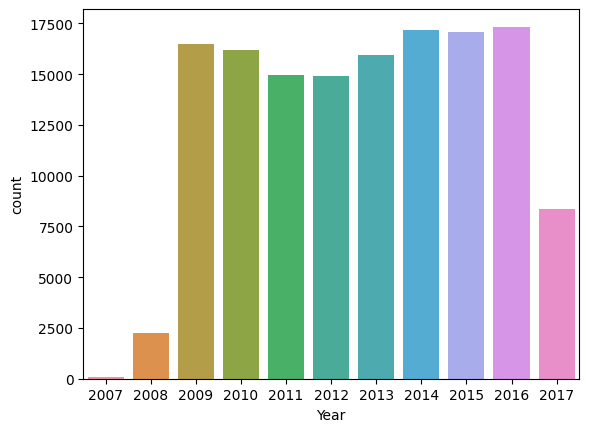

In [29]:
sns.countplot(x=data['Year'])


Logistic Regression

In [30]:
x_train

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
111481  0.483491  0.466919  0.000000     0.023448  0.586207       0.255814   
22067   0.523585  0.461248  0.006469     0.028966  0.593103       0.356589   
62876   0.393868  0.682420  0.000000     0.038621  0.868966       0.286822   
77330   0.320755  0.359168  0.000000     0.006897  0.027586       0.527132   
33440   0.533019  0.540643  0.000000     0.023448  0.731034       0.170543   
...          ...       ...       ...          ...       ...            ...   
62086   0.252358  0.281664  0.001078     0.006897  0.000000       0.069767   
123287  0.686321  0.686200  0.000000     0.074483  0.496552       0.224806   
54155   0.426887  0.500945  0.000000     0.033103  0.586207       0.271318   
120563  0.370283  0.559546  0.000000     0.035862  0.668966       0.286822   
140376  0.790094  0.748582  0.000000     0.045517  0.427586       0.193798   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
111481      0.015385      0.218391         0.65         0.52  ...   
22067       0.184615      0.379310         0.57         0.63  ...   
62876       0.053846      0.149425         0.75         0.25  ...   
77330       0.153846      0.252874         0.81         0.83  ...   
33440       0.084615      0.149425         0.69         0.41  ...   
...              ...           ...          ...          ...  ...   
62086       0.000000      0.103448         0.97         0.86  ...   
123287      0.100000      0.195402         0.50         0.44  ...   
54155       0.115385      0.195402         0.53         0.40  ...   
120563      0.130769      0.321839         0.62         0.44  ...   
140376      0.115385      0.275862         0.75         0.62  ...   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_Unknown  \
111481             0.0             0.0            0.0                 1.0   
22067              0.0             0.0            0.0                 0.0   
62876              0.0             0.0            0.0                 0.0   
77330              0.0             0.0            0.0                 0.0   
33440              0.0             0.0            0.0                 0.0   
...                ...             ...            ...                 ...   
62086              0.0             0.0            0.0                 0.0   
123287             0.0             0.0            1.0                 0.0   
54155              0.0             0.0            0.0                 0.0   
120563             0.0             0.0            0.0                 0.0   
140376             0.0             0.0            0.0                 0.0   

        WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  \
111481           0.0             0.0             0.0           1.0   
22067            0.0             0.0             0.0           0.0   
62876            0.0             0.0             1.0           1.0   
77330            0.0             0.0             0.0           1.0   
33440            0.0             0.0             0.0           1.0   
...              ...             ...             ...           ...   
62086            0.0             0.0             0.0           1.0   
123287           0.0             0.0             0.0           1.0   
54155            0.0             1.0             0.0           1.0   
120563           0.0             0.0             1.0           1.0   
140376           0.0             1.0             0.0           1.0   

        RainToday_Yes  Year  
111481            0.0  2017  
22067             1.0  2011  
62876             0.0  2013  
77330             0.0  2015  
33440             0.0  2017  
...               ...   ...  
62086             0.0  2011  
123287            0.0  2015  
54155             0.0  2014  
120563            0.0  2017  
140376            0.0  2012  

[95031 rows x 3555 columns]

In [31]:
data

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.033103  0.586207       0.294574   
1       0.375000  0.565217  0.000000     0.033103  0.586207       0.294574   
2       0.504717  0.576560  0.000000     0.033103  0.586207       0.310078   
3       0.417453  0.620038  0.000000     0.033103  0.586207       0.139535   
4       0.613208  0.701323  0.002695     0.033103  0.586207       0.271318   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.033103  0.586207       0.193798   
145455  0.266509  0.533081  0.000000     0.033103  0.586207       0.193798   
145456  0.285377  0.568998  0.000000     0.033103  0.586207       0.124031   
145457  0.327830  0.599244  0.000000     0.033103  0.586207       0.240310   
145458  0.384434  0.601134  0.000000     0.033103  0.586207       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.153846      0.275862         0.71         0.22  ...   
1           0.030769      0.252874         0.44         0.25  ...   
2           0.146154      0.298851         0.38         0.30  ...   
3           0.084615      0.103448         0.45         0.16  ...   
4           0.053846      0.229885         0.82         0.33  ...   
...              ...           ...          ...          ...  ...   
145454      0.115385      0.149425         0.59         0.27  ...   
145455      0.100000      0.126437         0.51         0.24  ...   
145456      0.100000      0.103448         0.56         0.21  ...   
145457      0.069231      0.103448         0.53         0.24  ...   
145458      0.100000      0.080460         0.51         0.24  ...   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_Unknown  \
0                  0.0             0.0            0.0                 0.0   
1                  0.0             0.0            0.0                 0.0   
2                  0.0             0.0            0.0                 0.0   
3                  0.0             0.0            0.0                 0.0   
4                  0.0             0.0            0.0                 0.0   
...                ...             ...            ...                 ...   
145454             0.0             0.0            0.0                 0.0   
145455             0.0             0.0            0.0                 0.0   
145456             0.0             0.0            0.0                 0.0   
145457             0.0             0.0            0.0                 0.0   
145458             0.0             0.0            0.0                 0.0   

        WindDir3pm_W  WindDir3pm_WNW WindDir3pm_WSW  RainToday_No  \
0                0.0             1.0            0.0           1.0   
1                0.0             0.0            1.0           1.0   
2                0.0             0.0            1.0           1.0   
3                0.0             0.0            0.0           1.0   
4                0.0             0.0            0.0           1.0   
...              ...             ...            ...           ...   
145454           0.0             0.0            0.0           1.0   
145455           0.0             0.0            0.0           1.0   
145456           0.0             0.0            0.0           1.0   
145457           0.0             1.0            0.0           1.0   
145458           0.0             0.0            0.0           1.0   

        RainToday_Yes  Year  
0                 0.0  2008  
1                 0.0  2008  
2                 0.0  2008  
3                 0.0  2008  
4                 0.0  2008  
...               ...   ...  
145454            0.0  2017  
145455            0.0  2017  
145456            0.0  2017  
145457            0.0  2017  
145458            0.0  2017  

[140787 rows x 3556 columns]

In [32]:
data.loc[data.isnull().any(axis=1)]



Empty DataFrame
Columns: [MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainTomorrow, Date_2007-11-01, Date_2007-11-02, Date_2007-11-03, Date_2007-11-04, Date_2007-11-05, Date_2007-11-06, Date_2007-11-07, Date_2007-11-08, Date_2007-11-09, Date_2007-11-10, Date_2007-11-11, Date_2007-11-12, Date_2007-11-13, Date_2007-11-14, Date_2007-11-15, Date_2007-11-16, Date_2007-11-17, Date_2007-11-18, Date_2007-11-19, Date_2007-11-20, Date_2007-11-21, Date_2007-11-22, Date_2007-11-23, Date_2007-11-24, Date_2007-11-25, Date_2007-11-26, Date_2007-11-27, Date_2007-11-28, Date_2007-11-29, Date_2007-11-30, Date_2007-12-01, Date_2007-12-02, Date_2007-12-03, Date_2007-12-04, Date_2007-12-05, Date_2007-12-06, Date_2007-12-07, Date_2007-12-08, Date_2007-12-09, Date_2007-12-10, Date_2007-12-11, Date_2007-12-12, Date_2007-12-13, Date_2007-12-14, Date_2007-12-15, Date_2007-12-16, Date_2007-12-17, Date_2007-12-18, Date_2007-12-19, Date_2007-12-20, Date_2007-12-21, Date_2007-12-22, Date_2007-12-23, Date_2007-12-24, Date_2007-12-25, Date_2007-12-26, Date_2007-12-27, Date_2007-12-28, Date_2007-12-29, Date_2007-12-30, Date_2007-12-31, Date_2008-01-01, Date_2008-01-02, Date_2008-01-03, Date_2008-01-04, Date_2008-01-05, Date_2008-01-06, Date_2008-01-07, Date_2008-01-08, Date_2008-01-09, Date_2008-01-10, Date_2008-01-11, Date_2008-01-12, Date_2008-01-13, Date_2008-01-14, Date_2008-01-15, Date_2008-01-16, Date_2008-01-17, Date_2008-01-18, Date_2008-01-19, Date_2008-01-20, Date_2008-01-21, Date_2008-01-22, ...]
Index: []

[0 rows x 3556 columns]

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(x_train, y_train)
print(x_train.columns)
print(model.coef_.tolist())

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_Unknown', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday_No', 'RainToday_Yes', 'Year'],
      dtype='object', length=3555)
[[0.719634714897253, -0.31256808425535165, 0.49571218947905393, 0.05587088430425772, -1.6792459239704314, 5.0487268724663785, 0.014492177063041473, -0.5188517431773353, 0.40358741247508007, 5.3244638994850435, -1.0227924613919679, -2.5517676243432823, 0.3638986627999697, 1.114131517190289, 0.5652830073012777, -0.38509018815047563, 0.022917201591551126, 0.022564642490699616, 0.0026959820219810086, 0.012502921336560911, 0.0, 0.0, -0.0015868597168316272, 0.0, 0.020782761406394432, 0.0, 0.0, 0.0, -0.00029944598264542604, -0.0005212676852133218, 0.0, -0.0003695044483542557, 0.0, 0.0, 0.0, 0.0, -0.0030

In [40]:
weight_df = pd.DataFrame({
    'feature': x_train.columns,
    'weight': model.coef_.tolist()[0]
})
weight_df

feature    weight
0            MinTemp  0.719635
1            MaxTemp -0.312568
2           Rainfall  0.495712
3        Evaporation  0.055871
4           Sunshine -1.679246
...              ...       ...
3550  WindDir3pm_WNW  0.137498
3551  WindDir3pm_WSW -0.225778
3552    RainToday_No -0.264081
3553   RainToday_Yes  0.259320
3554            Year -0.001937

[3555 rows x 2 columns]

<AxesSubplot: xlabel='weight', ylabel='feature'>

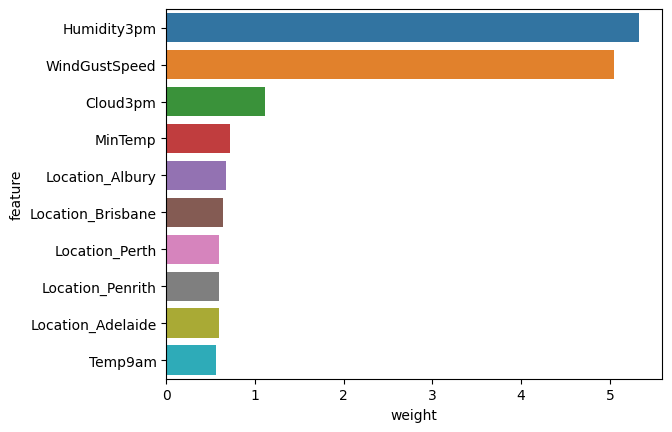

In [41]:
sns.barplot(data=weight_df.sort_values('weight', ascending=False).head(10), x='weight', y='feature')

In [44]:
train_predictions = model.predict(x_train)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [45]:
from sklearn. metrics import accuracy_score

accuracy_score(y_train, train_predictions)

0.8519325272805716

In [51]:
train_probabilities = model.predict_proba(x_train)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, train_predictions, normalize='true')

array([[0.94879547, 0.05120453],
       [0.49087696, 0.50912304]])

In [50]:
test_predictions = model.predict(x_test)
accuracy_score(y_test, test_predictions)

0.8467930961005753